### Convolutional Networks for Wind Speed  Multi-Step Time-Series Forecasting

In [49]:
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
from Wind.Results import DBResults
from Wind.Private.DBConfig import mongoremote,mongolocal,mongolocaltest
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pprint
import json
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [51]:
def print_config(name):
# read and print .json file
   with open('e:/Wind/Scripts/MultipleData/configsjm/'+ name + '.json') as json_file:
      data = json.load(json_file)
      pprint.pprint(data)
   return

In [59]:
def create_figure_barras(archs, titles, cmap="RdPu", title_label='Diagrama de Barras',save=False):
    bars = []
    for a in archs:
        query = {"experiment": a,"status":"done"}
        results = DBResults(conn=mongolocal)
        results.retrieve_results(query)
        results.selected_size()
        arr = results.exp_result

        arr_test_array = arr.get('test')
        ERROR = np.mean(arr_test_array,axis=0)
        print(ERROR)
        bars.append(list(ERROR))

        
    prop = 100
    pixels = np.zeros((12*prop, 1))
    barras = []

    for column in bars:
        ERROR_pixels = np.zeros((12*prop,1))
        col_array = np.array(column)
        for i in range(12):
            for j in range(prop):
                ERROR_pixels[(i*prop)+j] = col_array[i]   
        barra = np.tile(ERROR_pixels, (1,100))   
        barras.append(list(barra))
        
        
    n_cols = len(barras)
    print(n_cols)
    fig,axs = plt.subplots(1,n_cols, figsize=(10,10),sharex='col', sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0},
                       constrained_layout=True)
        
    axs[0].set_ylabel('$R^2$ (12 steps)',fontsize=40)
    
    for i in range (0,n_cols):
    
        axs[i].yaxis.set_ticklabels(np.arange(-2, 12, step=2),fontsize=30)
        axs[i].xaxis.set_ticklabels([])
        axs[i].set_xlabel(titles[i],fontsize=30)
        axs[i].imshow(barras[i], cmap = "Reds_r", norm= colors.Normalize(vmin=0.4,vmax=1.))
    
    fig.suptitle('Methods $R^2$ error comparison ', fontsize=40)
    
    if save == True:
       plt.savefig('barras.pdf', format='pdf')  
    plt.show()
    return 

This notebook contains all the results from experiments presented in the article "Convolutional Networks for Wind Speed  Multi-Step Time-Series Forecasting" The original data is stored in a MONGODB database that contains all the raw details from the executions. All the programs for this experimentation have been run in the Minotauro MultiGPU at Barcelona Supercomputing Center in 2019 and 2020.

### RF baseline

In [356]:
query = {"experiment": "JM_RF_s2s_2","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

126692

MEAN (test)= 6.770120707927505
StDev (test)= 0.8047620859978747
MEAN (val)= 6.532462243553213
StDev (val)= 0.7377275195651427


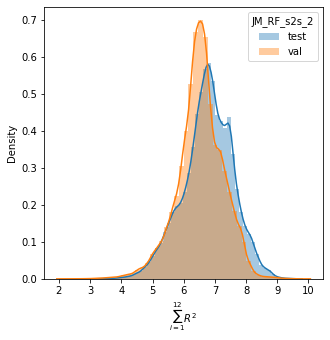

In [357]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

## Classic CNN Architecture
### CNN 2L

In [32]:
query = {"experiment": "JM_CNN_2L","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [35]:
print_config('config_CNN_2L_s2s')

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['leaky', 0.2],
          'dilation': False,
          'drop': 0.3,
          'drop2': 0.2,
          'filters': [128],
          'filters2': [128],
          'full': [512],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3],
          'kernel_size2': [1],
          'mode': 'CNN_2l_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1],
          'strides2': [1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5584-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN-2L',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


MEAN (test)= 7.2257681101353555
StDev (test)= 0.8005374713628273
MEAN (val)= 6.90798312324942
StDev (val)= 0.7355034172464132


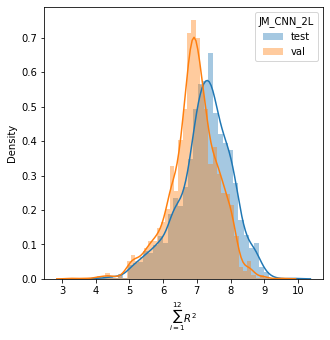

In [34]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### CNN 3L

In [361]:
query = {"experiment": "JM_CNN_3L","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [362]:
print_config('config_CNN_3L_s2s')

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.2,
          'drop2': 0.6,
          'drop3': 0.5,
          'filters': [128],
          'filters2': [256],
          'filters3': [256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3],
          'kernel_size2': [1],
          'kernel_size3': [1],
          'mode': 'CNN_3l_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1],
          'strides2': [1],
          'strides3': [1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_3l_s2s',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter

MEAN (test)= 7.222775421958853
StDev (test)= 0.800938320127753
MEAN (val)= 6.894758287688494
StDev (val)= 0.7343124541330225


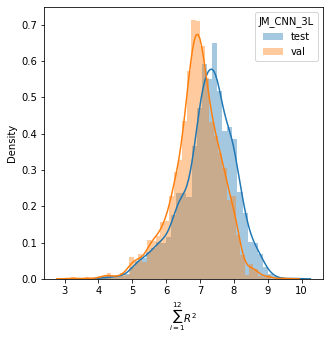

In [363]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### CNN 4L

In [364]:
query = {"experiment": "JM_CNN_4L","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

In [365]:
print_config('config_CNN_4L_s2s')

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.2,
          'drop2': 0.6,
          'drop3': 0.5,
          'drop4': 0.5,
          'filters': [128],
          'filters2': [256],
          'filters3': [256],
          'filters4': [256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3],
          'kernel_size2': [1],
          'kernel_size3': [1],
          'kernel_size4': [1],
          'mode': 'CNN_4l_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1],
          'strides2': [1],
          'strides3': [1],
          'strides4': [1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'al

MEAN (test)= 7.189581095506534
StDev (test)= 0.8035263770810934
MEAN (val)= 6.858041511353047
StDev (val)= 0.7332900243052706


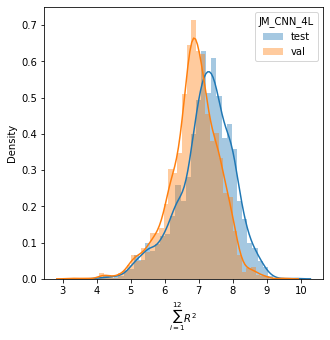

In [366]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### CNN 5L

In [367]:
query = {"experiment": "JM_CNN_5L_MIMO","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.152083690923029
StDev (test)= 0.8093919601061584
MEAN (val)= 6.81567060753176
StDev (val)= 0.7350991059371267


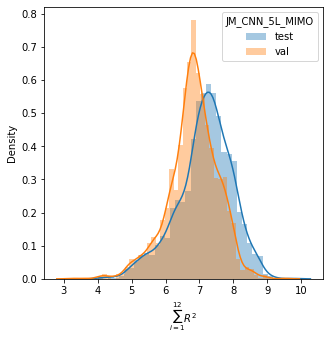

In [368]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [369]:
print_config('config_CNN_MIMO_5L')

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256, 256],
          'full': [512],
          'fulldrop': 0.2,
          'fulltype': 'mlp',
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1, 1],
          'mode': 'CNN_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5584-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_MIMO_2L',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN 6L MIMO

In [370]:
query = {"experiment": "JM_CNN_6L_MIMO","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.106360350359217
StDev (test)= 0.8089545636964103
MEAN (val)= 6.771329562682721
StDev (val)= 0.7327173413337387


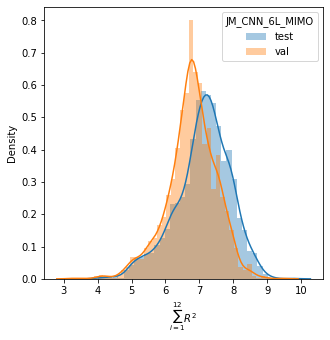

In [371]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [372]:
print_config('config_CNN_MIMO_6L')

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256, 256, 256],
          'full': [512],
          'fulldrop': 0.2,
          'fulltype': 'mlp',
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1, 1, 1],
          'mode': 'CNN_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5584-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_MIMO_2L',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN_MIMO 7L

In [373]:
query = {"experiment": "JM_CNN_7L_MIMO","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.0524391010584235
StDev (test)= 0.8076598396712453
MEAN (val)= 6.749846622615074
StDev (val)= 0.7343488774994985


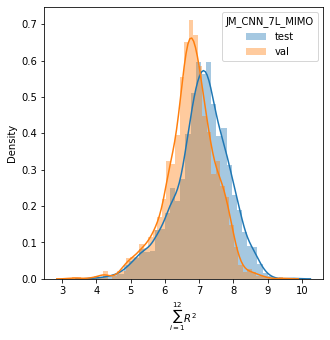

In [374]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [375]:
print_config('config_CNN_MIMO_7L')

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256, 256, 256, 256],
          'full': [512],
          'fulldrop': 0.2,
          'fulltype': 'mlp',
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1, 1, 1, 1],
          'mode': 'CNN_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5584-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_MIMO_7L',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN 8L MIMO

In [376]:
query = {"experiment": "JM_CNN_8L_MIMO","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

1999

MEAN (test)= 5.44995181281984
StDev (test)= 3.042721223523469
MEAN (val)= 5.2031102413285835
StDev (val)= 2.905121055107689


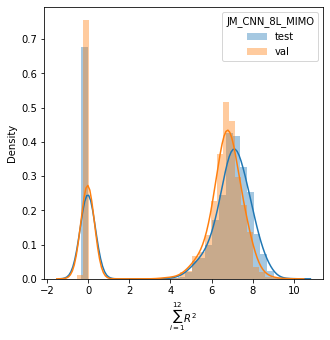

In [377]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [378]:
print_config('config_CNN_MIMO_8L')

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256, 256, 256, 256, 256],
          'full': [512],
          'fulldrop': 0.2,
          'fulltype': 'mlp',
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1, 1, 1, 1, 1],
          'mode': 'CNN_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1, 1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5584-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_MIMO_8L',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


## Separable CNN Architectures
### CNN-Sep 1 layer

In [379]:
query = {"experiment": "JM_CNN_sep","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.300770611159176
StDev (test)= 0.7976043347984896
MEAN (val)= 6.991350820234412
StDev (val)= 0.7522393958362509


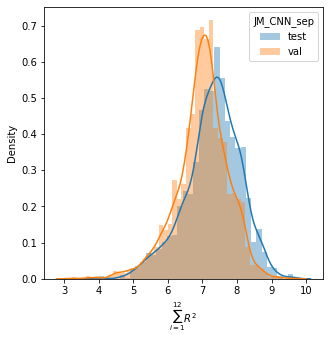

In [380]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [381]:
print_config("config_CNN_sep_s2s_JM")

{'_id': 'CNN_sep',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['leaky', 0.2],
          'depth_multiplier': 5,
          'dilation': False,
          'drop': 0.5,
          'filters': [512],
          'full': [1024],
          'fulldrop': 0.4,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [9],
          'mode': 'CNN_sep_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [3]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### Separable 2 layers JM_SEP_2l (2000 sites)

In [382]:
query = {"experiment": "JM_CNN_sep_2l_B","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.320931027921126
StDev (test)= 0.7979096196569432
MEAN (val)= 7.008636432620585
StDev (val)= 0.7542893131604126


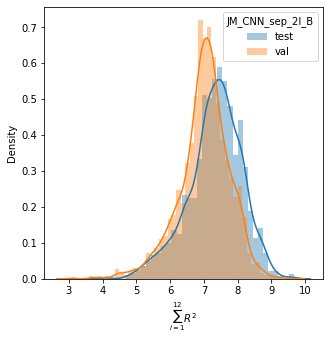

In [383]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [384]:
print_config("config_CNN_sep_2l_s2s_JM")

{'_id': 'CNN_sep_2l',
 'arch': {'activation': ['elu', 0.3],
          'activation2': ['elu', 0.3],
          'activation_full': ['elu', 0.4],
          'depth_multiplier': 8,
          'depth_multiplier2': 7,
          'dilation': False,
          'drop': 0.6,
          'drop2': 0.6,
          'filters': [1024],
          'filters2': [1024],
          'full': [1024],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [9],
          'kernel_size2': [1],
          'mode': 'CNN_sep_2l_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [2],
          'strides2': [4]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter'

### Separable 2 Layers JM_SEP_2l (126.692 sites)

In [385]:
query = {"experiment": "JM_CNN_sep_2l_FULL","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

126692

MEAN (test)= 7.316929105499875
StDev (test)= 0.8044699625439071
MEAN (val)= 7.002531903529451
StDev (val)= 0.7503857559258261


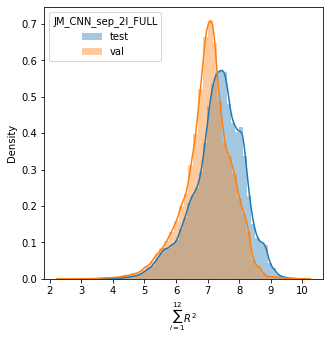

In [386]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### Separable 3 layers JM_CNN_sep_3l

In [387]:
query = {"experiment": "JM_CNN_sep_3l","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.301759195389126
StDev (test)= 0.7957460874531367
MEAN (val)= 6.9883294035429095
StDev (val)= 0.7458061735753356


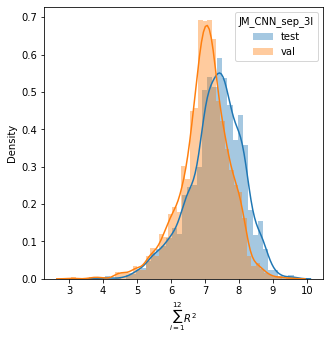

In [388]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [389]:
print_config("config_CNN_sep_3l_s2s_JM")

{'_id': 'CNN_3l',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'depth_multiplier': 4,
          'depth_multiplier2': 7,
          'depth_multiplier3': 4,
          'dilation': False,
          'drop': 0.6,
          'drop2': 0.6,
          'drop3': 0.7,
          'filters': [512],
          'filters2': [1024],
          'filters3': [1024],
          'full': [4096],
          'fulldrop': 0.0,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [5],
          'kernel_size2': [3],
          'kernel_size3': [3],
          'mode': 'CNN_sep_3l_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [3],
          'strides2': [4],
          'strides3': [4]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 18,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},

### Separable 4 layers JM_CNN_sep_4l

In [390]:
query = {"experiment": "JM_CNN_sep_4l","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 6.832675006428014
StDev (test)= 0.8087558110143385
MEAN (val)= 6.519693567567577
StDev (val)= 0.7567396481593395


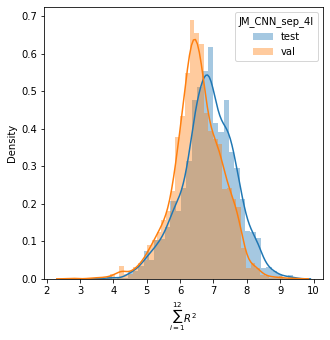

In [391]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### CNN sep 4L MIMO

In [392]:
query = {"experiment": "JM_CNN_sep_4L_01","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.20517039077765
StDev (test)= 0.8065575311183103
MEAN (val)= 6.892974197627187
StDev (val)= 0.736283080073989


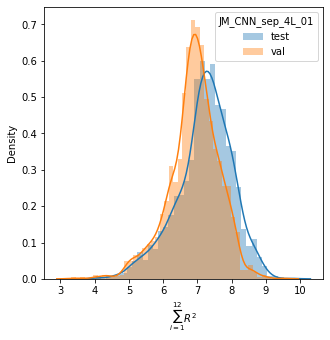

In [393]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [394]:
print_config("config_CNN_sep_MIMO_4L")

{'_id': 'CNN_sep MIMO 4L',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.4],
          'depth_multiplier': 7,
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256],
          'full': [1024],
          'fulldrop': 0.1,
          'fulltype': 'mlp',
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1],
          'mode': 'CNN_sep_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN sep 5L MIMO

In [395]:
query = {"experiment": "JM_CNN_sep_5L","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()
# ESTA MAL REPETIR

1922

MEAN (test)= 7.156712749823947
StDev (test)= 0.8105298090771417
MEAN (val)= 6.848242785324778
StDev (val)= 0.7364555733724911


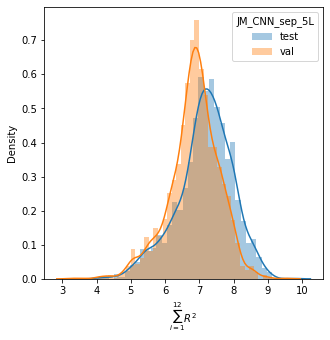

In [396]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [397]:
print_config("config_CNN_sep_MIMO_5L")

{'_id': 'CNN_sep MIMO 2L',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.4],
          'depth_multiplier': 7,
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256, 256],
          'full': [1024],
          'fulldrop': 0.1,
          'fulltype': 'mlp',
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1, 1],
          'mode': 'CNN_sep_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN sep 6L

In [398]:
query = {"experiment": "JM_CNN_sep_6L","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.1157178783134425
StDev (test)= 0.8088335488991628
MEAN (val)= 6.806462946486774
StDev (val)= 0.7358669257576345


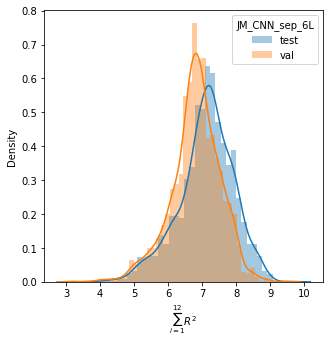

In [399]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [400]:
print_config("config_CNN_sep_MIMO_6L")

{'_id': 'CNN_sep MIMO 2L',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'depth_multiplier': 7,
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256, 256, 256],
          'full': [1024],
          'fulldrop': 0.1,
          'fulltype': 'mlp',
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1, 1, 1],
          'mode': 'CNN_sep_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10

### CNN sep MIMO 7L 

In [401]:
query = {"experiment": "JM_CNN_sep_7L","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.0539478269330935
StDev (test)= 0.8087297995411785
MEAN (val)= 6.749445851454255
StDev (val)= 0.7362466181961755


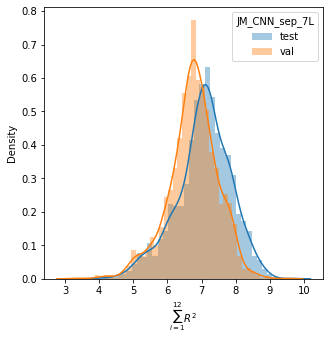

In [402]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [403]:
print_config("config_CNN_sep_MIMO_7L")

{'_id': 'CNN_sep MIMO 7L',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.4],
          'depth_multiplier': 7,
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256, 256, 256, 256],
          'full': [1024],
          'fulldrop': 0.1,
          'fulltype': 'mlp',
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1, 1, 1, 1],
          'mode': 'CNN_sep_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'pa

### CNN sep 8L MIMO

In [404]:
query = {"experiment": "JM_CNN_sep_8L","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 5.44783940405547
StDev (test)= 3.0497775785798615
MEAN (val)= 5.20747270600913
StDev (val)= 2.914527719491282


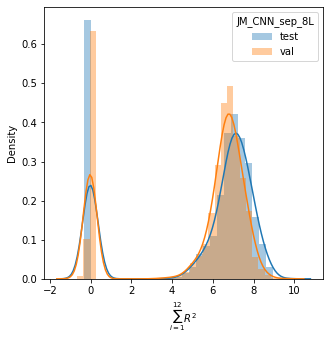

In [405]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [406]:
print_config("config_CNN_sep_MIMO_8L")

{'_id': 'CNN_sep MIMO 8L',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.4],
          'depth_multiplier': 7,
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256, 256, 256, 256, 256],
          'full': [1024],
          'fulldrop': 0.1,
          'fulltype': 'mlp',
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1, 1, 1, 1, 1],
          'mode': 'CNN_sep_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1, 1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
      

### Gradient Boosting vanilla CNN

In [407]:
query = {"experiment": "JM_CNN_GB","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.218917798055141
StDev (test)= 0.7982300385354558
MEAN (val)= 6.916134508920039
StDev (val)= 0.7522489655757946


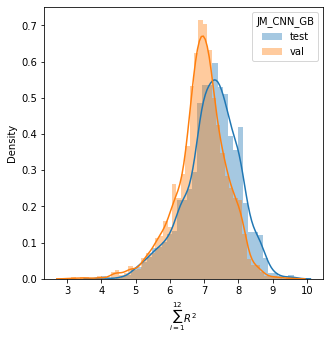

In [408]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### Gradient Boosting Separables CNN

In [409]:
query = {"experiment": "JM_CNN_sep_2l_GB1","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

1985

MEAN (test)= 7.341460494413647
StDev (test)= 0.7955465724947584
MEAN (val)= 7.042803619401421
StDev (val)= 0.7530766517785474


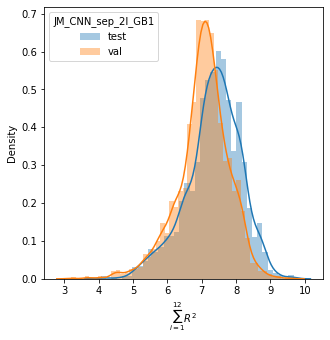

In [410]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### Plot Comparison

In [411]:
query1 = {"experiment": "JM_RF_s2s_2","status":"done"}
query2 = {"experiment": "JM_CNN_sep_2l_FULL","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results_compare(query1, query2)
results.selected_size()

126692

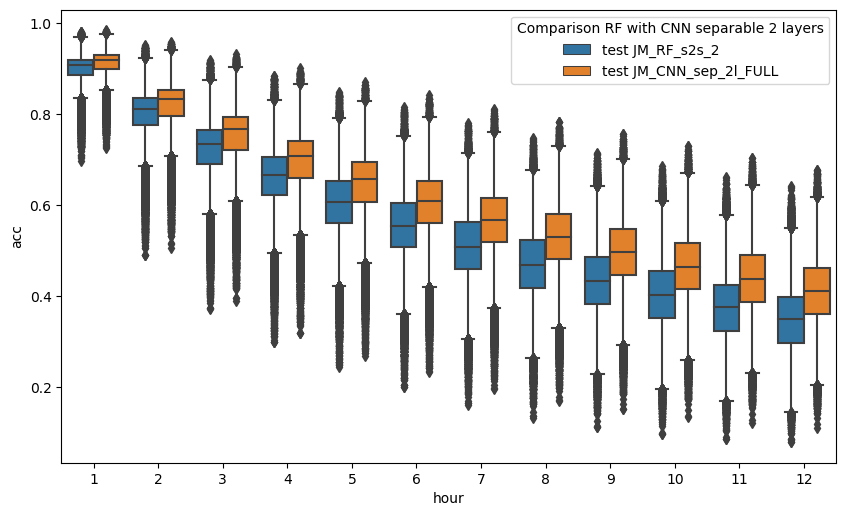

In [412]:
results.plot_hours_boxplot_compare(title = 'Comparison RF with CNN separable 2 layers',save= "Boxplot_RF_CNN_sep", dset=('test'), saveformat = 'pdf', figsize=(10,6))

### Graph Comparison

In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = {'Experiment':['RF_Baseline', 'CNN_sep_1_Layer', 'CNN_sep_2_Layer',  'CNN_sep_3_Layer', 
        'CNN_sep_4_Layer', 'CNN_Baseline', 'CNN_sep_2_Layer_with GB'],
        'MEAN (test)':[6.770120707927505, 7.300770611159176, 7.320931027921126, 7.301759195389126,
                       6.832675006428014, 7.184909490615683, 7.341460494413647] ,
        'StDev (test)': [0.8047620859978747,0.7976043347984896, 0.7979096196569432, 0.7957460874531367,
                        0.8087558110143385, 0.8020160422549318, 0.7955465724947584],
        'MEAN (val)':[6.532462243553213, 6.991350820234412, 7.008636432620585, 6.9883294035429095,
                     6.519693567567577, 6.867822678018074, 7.042803619401421] ,
        'StDev (val)': [6.532462243553213, 0.7522393958362509, 0.7542893131604126, 0.7458061735753356,
                     0.7567396481593395, 0.7540981083149264, 0.7530766517785474]    
       } 

df = pd.DataFrame(data) 
df = result = df.sort_values(['MEAN (test)', 'MEAN (val)'], ascending=[1, 0])

exps = df['Experiment'].values.tolist()
mean_test = df['MEAN (test)'].values.tolist()
mean_val = df['MEAN (val)'].values.tolist()



In [414]:
exps

['RF_Baseline',
 'CNN_sep_4_Layer',
 'CNN_Baseline',
 'CNN_sep_1_Layer',
 'CNN_sep_3_Layer',
 'CNN_sep_2_Layer',
 'CNN_sep_2_Layer_with GB']

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

[[<matplotlib.axis.YTick at 0x1aa155ef128>,
 [Text(0, 0, 'RF_Baseline'),
  Text(0, 0, 'CNN_sep_4_Layer'),
  Text(0, 0, 'CNN_Baseline'),
  Text(0, 0, 'CNN_sep_1_Layer'),
  Text(0, 0, 'CNN_sep_3_Layer'),
  Text(0, 0, 'CNN_sep_2_Layer'),
  Text(0, 0, 'CNN_sep_2_Layer_with GB')],
 (-0.4, 7)]

Text(0.5, 0, '$\\sum R^2 (i=1, 12)$')

(4, 8)

Text(0.5, 1.0, 'Method Comparison (Validation and Test)')

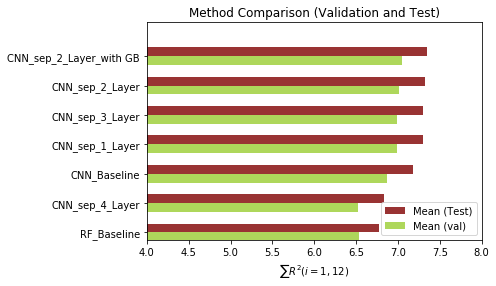

In [415]:



ind = np.arange(len(exps))
width=0.3 

ax = plt.subplot(111)
ax.barh(ind, mean_test, width, align='center', alpha=0.8, color='maroon', label='Mean (Test)') 
ax.barh(ind - width, mean_val, width, align='center', alpha=0.8, color='yellowgreen', label='Mean (val)') 
ax.set(yticks=ind - width/2, yticklabels=exps, ylim=[2*width - 1, len(exps)])
plt.xlabel('$\sum R^2 (i=1, 12)$')
plt.xlim([4,8])

plt.title('Method Comparison (Validation and Test)')
plt.legend()
plt.savefig('e:\method_comparisons.pdf',bbox_inches = "tight")
plt.show()



### MultiHeaded

In [416]:
query = {"experiment": "JM_CNN_CI_s2s","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 6.8702972672630445
StDev (test)= 0.8248184140827786
MEAN (val)= 6.544036300109385
StDev (val)= 0.770051259184671


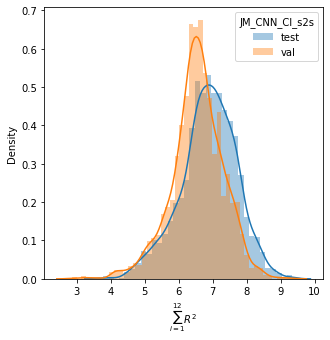

In [417]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### Inception Time

In [418]:
query = {"experiment": "JM_DreamTime","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 6.841453208424476
StDev (test)= 0.7938711548202332
MEAN (val)= 6.548555474650248
StDev (val)= 0.742722293079048


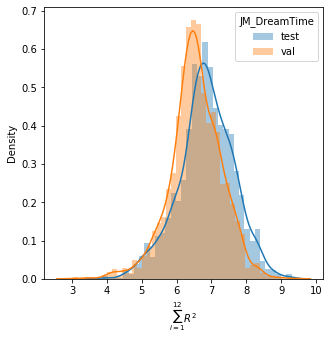

In [419]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### Architectures with SKIP connections

### CNN SKIP 1Layer

In [420]:
query = {"experiment": "JM_CNN_1L_SKIP","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 6.935327239201122
StDev (test)= 0.7988283997345355
MEAN (val)= 6.671008462622118
StDev (val)= 0.7303795092141188


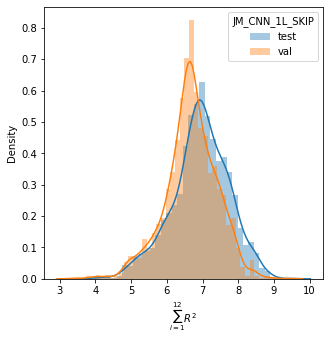

In [421]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [422]:
print_config("config_CNN_1L_skip")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.3,
          'filters': [128],
          'full': [16, 8],
          'fulldrop': 0.2,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [5],
          'mode': 'CNN_skip_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_1L_Skip',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN Skip 2 Layers

In [423]:
query = {"experiment": "JM_CNN_2L_SKIP","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.2228615372300595
StDev (test)= 0.7981908227717746
MEAN (val)= 6.9044645678636805
StDev (val)= 0.7378184227485595


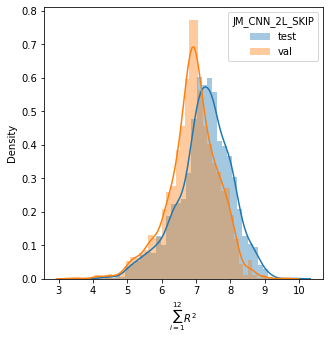

In [424]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [425]:
print_config("config_CNN_2L_skip")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['leaky', 0.2],
          'dilation': False,
          'drop': 0.3,
          'filters': [128, 128],
          'full': [512],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 3],
          'mode': 'CNN_skip_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN SKIP 3Layers

In [426]:
query = {"experiment": "JM_CNN_3L_SKIP","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.221268636614315
StDev (test)= 0.7980067595722375
MEAN (val)= 6.903105781050659
StDev (val)= 0.7376426407524693


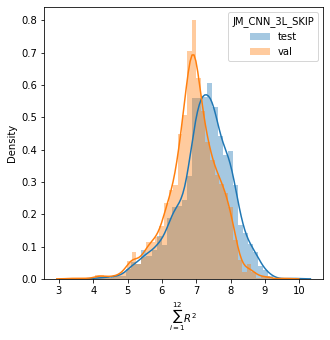

In [427]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [428]:
print_config("config_CNN_3L_skip")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.4,
          'filters': [128, 256, 256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1],
          'mode': 'CNN_skip_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN SKIP 4Layers

In [429]:
query = {"experiment": "JM_CNN_4L_SKIP","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.201385774228026
StDev (test)= 0.8059355061177899
MEAN (val)= 6.871271230229861
StDev (val)= 0.7394237070331147


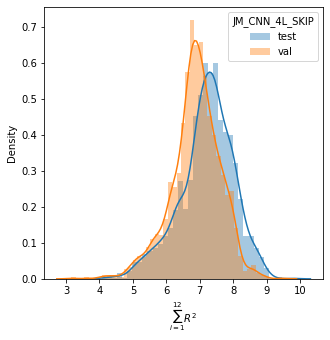

In [430]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [431]:
print_config("config_CNN_4L_skip")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1],
          'mode': 'CNN_skip_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN SKIP 5L

In [432]:
query = {"experiment": "JM_CNN_5L_SKIP","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.1828242752911935
StDev (test)= 0.8104410298305199
MEAN (val)= 6.84957418102309
StDev (val)= 0.738532169267009


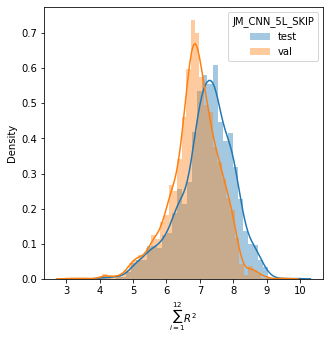

In [433]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [434]:
print_config("config_CNN_5L_skip")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256, 256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1, 1],
          'mode': 'CNN_skip_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN Skip 6L

In [435]:
query = {"experiment": "JM_CNN_6L_SKIP","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.157154316088481
StDev (test)= 0.8133534826247729
MEAN (val)= 6.820981116049208
StDev (val)= 0.7386782616695111


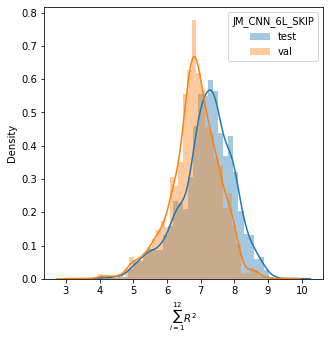

In [436]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [437]:
print_config("config_CNN_6L_skip")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256, 256, 256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1, 1, 1],
          'mode': 'CNN_skip_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TEST',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN SKIP 7L

In [438]:
query = {"experiment": "JM_CNN_7L_skip","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

1960

MEAN (test)= 7.129590188698342
StDev (test)= 0.8144448007918265
MEAN (val)= 6.789764747554228
StDev (val)= 0.7385814182937502


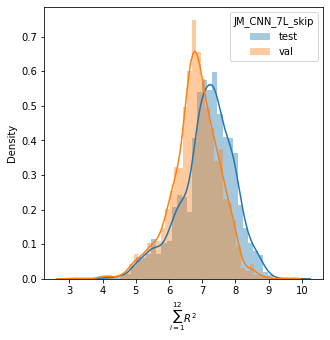

In [439]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [440]:
print_config("config_CNN_7L_skip")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256, 256, 256, 256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1, 1, 1, 1],
          'mode': 'CNN_skip_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_7L_skip',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN Skip 8L

In [441]:
query = {"experiment": "JM_CNN_8L_skip","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.090304661453285
StDev (test)= 0.8178861379479077
MEAN (val)= 6.751250137241301
StDev (val)= 0.739436444658853


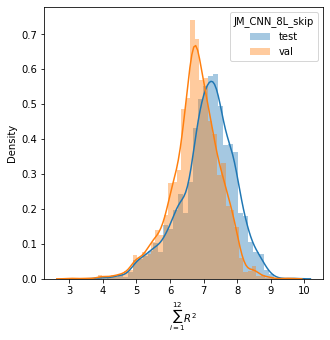

In [442]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [443]:
print_config("config_CNN_8L_skip")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256, 256, 256, 256, 256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1, 1, 1, 1, 1],
          'mode': 'CNN_skip_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1, 1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_8L_skip',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### Residuals

### CNN Residuals 1L

In [444]:
query = {"experiment": "JM_CNN_1L_residual","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 6.861873164938736
StDev (test)= 0.7985935820174883
MEAN (val)= 6.601523390367634
StDev (val)= 0.7346159657887656


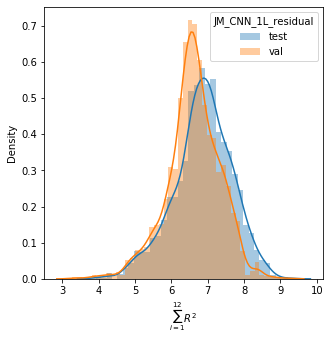

In [445]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [446]:
print_config("config_CNN_1L_residual")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.3,
          'filters': [128],
          'full': [16, 8],
          'fulldrop': 0.2,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [5],
          'mode': 'CNN_res_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_1L_residual',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN Residuals 2L

In [447]:
query = {"experiment": "JM_CNN_2L_residual","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.135765119396111
StDev (test)= 0.8058663018438488
MEAN (val)= 6.834171155907422
StDev (val)= 0.7391376167579861


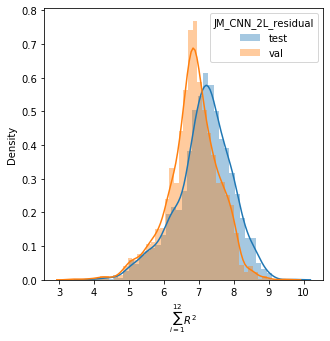

In [448]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [449]:
print_config("config_CNN_2L_residual")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['leaky', 0.2],
          'dilation': False,
          'drop': 0.3,
          'filters': [128, 128],
          'full': [512],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 3],
          'mode': 'CNN_res_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_2L_residual',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN Residuals 3L

In [450]:
query = {"experiment": "JM_CNN_3L_residual","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.134580424128182
StDev (test)= 0.8047727216772544
MEAN (val)= 6.832479576283622
StDev (val)= 0.7394336330995742


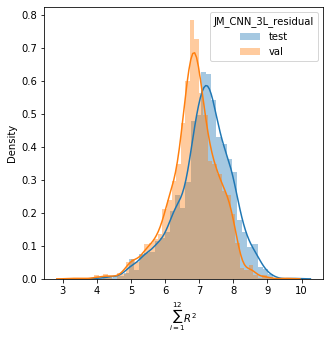

In [451]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [452]:
print_config("config_CNN_3L_residual")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.4,
          'filters': [128, 256, 256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1],
          'mode': 'CNN_res_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_3L_residual',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN Residuals 4L

In [453]:
query = {"experiment": "JM_CNN_4L_residual","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.117924732394289
StDev (test)= 0.8045218821284249
MEAN (val)= 6.806575964541244
StDev (val)= 0.7329901939008666


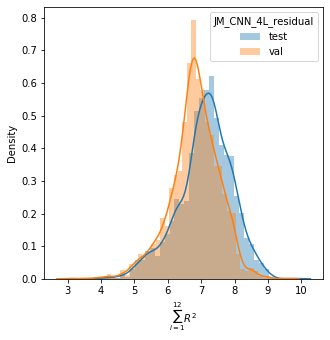

In [454]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [455]:
print_config("config_CNN_4L_residual")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1],
          'mode': 'CNN_res_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_4L_residual',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN Residual 5L

In [456]:
query = {"experiment": "JM_CNN_5L_residual","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.0957881449840094
StDev (test)= 0.8068290865932701
MEAN (val)= 6.785205925466761
StDev (val)= 0.7356985025541538


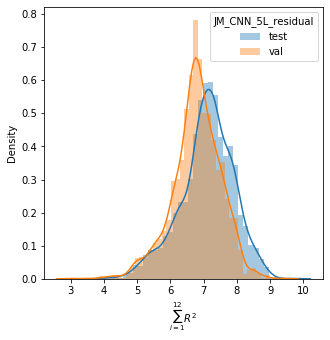

In [457]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [458]:
print_config("config_CNN_5L_residual")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256, 256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1, 1],
          'mode': 'CNN_res_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_4L_residual',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN Residual 6L

In [459]:
query = {"experiment": "JM_CNN_6L_residual","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.075760363455344
StDev (test)= 0.8063970789203633
MEAN (val)= 6.766919138874226
StDev (val)= 0.7337720039106792


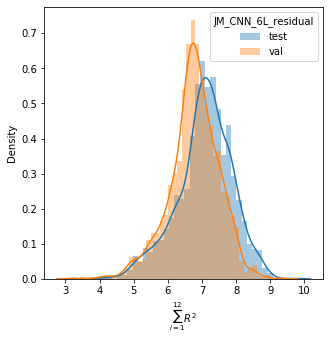

In [460]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [461]:
print_config("config_CNN_6L_residual")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256, 256, 256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1, 1, 1],
          'mode': 'CNN_res_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_4L_residual',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN Residual 7L

In [462]:
query = {"experiment": "JM_CNN_7L_residual","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.054722230982505
StDev (test)= 0.8099122723768377
MEAN (val)= 6.746083878020958
StDev (val)= 0.736980199653559


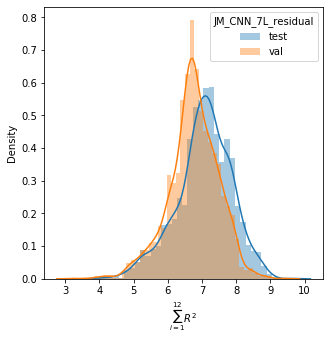

In [463]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [464]:
print_config("config_CNN_7L_residual")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256, 256, 256, 256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1, 1, 1, 1],
          'mode': 'CNN_res_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_7L_residual',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


### CNN residual 8L

In [465]:
query = {"experiment": "JM_CNN_8L_residual","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.036243260863932
StDev (test)= 0.8093842987043912
MEAN (val)= 6.728375036089112
StDev (val)= 0.7389957464488227


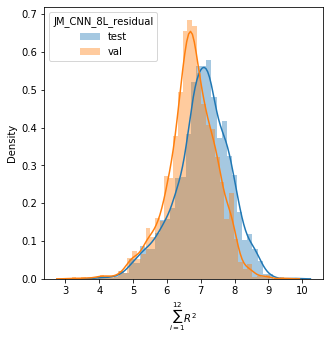

In [466]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [467]:
print_config("config_CNN_8L_residual")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'dilation': False,
          'drop': 0.5,
          'filters': [128, 256, 256, 256, 256, 256, 256, 256],
          'full': [512],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3, 1, 1, 1, 1, 1, 1, 1],
          'mode': 'CNN_res_mimo',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1, 1, 1, 1, 1, 1, 1, 1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 6,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_8L_residual',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              'lrate': 0.001,
              'optimizer': 'adamax',
              'patience': 10}}


In [468]:
### Gradient Boosting Architectures 

### Gradient Boosting 2L GB

In [469]:
query = {"experiment": "JM_CNN_sep_2l_GB1","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

1985

MEAN (test)= 7.341460494413647
StDev (test)= 0.7955465724947584
MEAN (val)= 7.042803619401421
StDev (val)= 0.7530766517785474


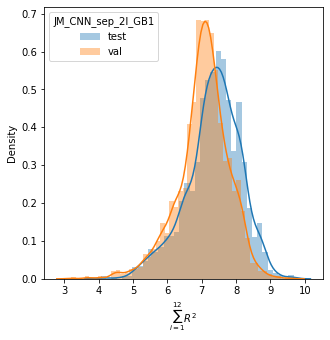

In [470]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### CNN GB with CNN 2L classic

In [471]:
query = {"experiment": "JM_CNN_2L_GB_01","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.232213242964042
StDev (test)= 0.7940244888390535
MEAN (val)= 6.959236504608525
StDev (val)= 0.7313836556285288


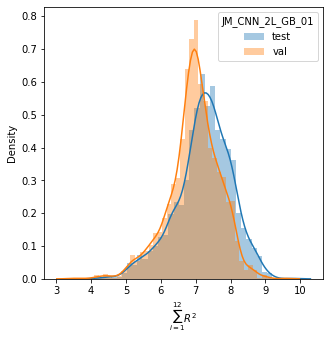

In [472]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [473]:
print_config("config_CNN_2L_GB")

{'_id': 'CNN_2l_GB',
 'arch': {'activation': ['elu', 0.4],
          'activation2': ['elu', 0.4],
          'activation_full': ['leaky', 0.3],
          'alpha': 0.3,
          'decay': 0.9,
          'depth_multiplier': 8,
          'depth_multiplier2': 7,
          'dilation': False,
          'drop': 0.3,
          'drop2': 0.2,
          'filters': [128],
          'filters2': [128],
          'full': [512],
          'fulldrop': 0.3,
          'fulltype': 'mlp',
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3],
          'kernel_size2': [1],
          'mode': 'CNN_s2s_gb',
          'nmodels': 5,
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1],
          'strides2': [1]},
 'data': {'ahead': [1, 12],
          'datanames': ['92-46325-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'exp

In [474]:
### Multihead Architectures (2,3,4 heads)

### Multihead 2 heads

In [475]:
query = {"experiment": "JM_CNN_MH_2H_01","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.144786772235419
StDev (test)= 0.7925073591398172
MEAN (val)= 6.829456928071951
StDev (val)= 0.7311577718411607


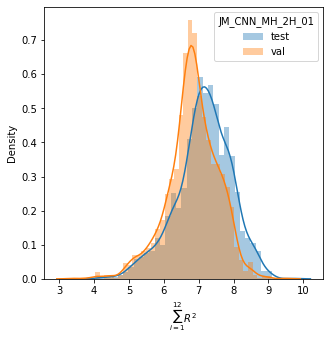

In [476]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [477]:
print_config("config_CNN_MH_2H")

{'_id': '00000000',
 'arch': {'activation': 'relu',
          'activation_full': 'linear',
          'dilation': False,
          'drop': 0.3,
          'drop2': 0.3,
          'drop3': 0.3,
          'filters': [128],
          'filters2': [128],
          'filters3': [128],
          'full': [16, 8],
          'fulldrop': 0,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3],
          'kernel_size2': [1],
          'kernel_size3': [1],
          'mode': 'CNN_CI_2H_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1],
          'strides2': [1],
          'strides3': [1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5548-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 18,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_MH_2H',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
 

### Multihead 3 heads

In [478]:
query = {"experiment": "JM_CNN_MH_3H_01","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.169526107336671
StDev (test)= 0.7961197659155779
MEAN (val)= 6.854264315934873
StDev (val)= 0.7347252038397911


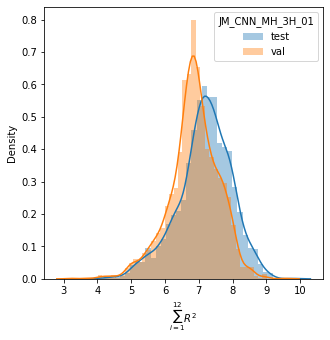

In [479]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [480]:
print_config("config_CNN_MH_3H")

{'_id': '00000000',
 'arch': {'activation': 'relu',
          'activation_full': 'linear',
          'dilation': False,
          'drop': 0,
          'drop2': 0,
          'drop3': 0,
          'filters': [32],
          'filters2': [32],
          'filters3': [32],
          'full': [16, 8],
          'fulldrop': 0,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [7],
          'kernel_size2': [7],
          'kernel_size3': [7],
          'mode': 'CNN_CI_3H_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1],
          'strides2': [1],
          'strides3': [1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5548-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 18,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'CNN_MH_3H',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
          

### Multihead 4 heads

In [481]:
query = {"experiment": "JM_CNN_MH_4H","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.124776602664115
StDev (test)= 0.7884349838751543
MEAN (val)= 6.8157604991174106
StDev (val)= 0.7278919470195206


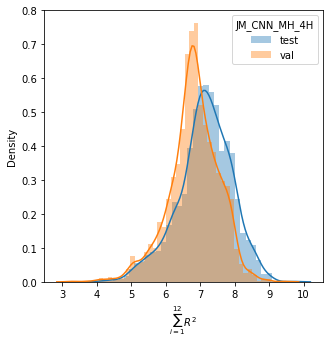

In [482]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [483]:
print_config("config_CNN_MH_4H")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['leaky', 0.2],
          'dilation': False,
          'drop': 0.5,
          'drop2': 0.5,
          'drop3': 0.5,
          'drop4': 0.5,
          'filters': [256],
          'filters2': [128],
          'filters3': [128],
          'filters4': [128],
          'full': [512],
          'fulldrop': 0.2,
          'fulltype': 'mlp',
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3],
          'kernel_size2': [1],
          'kernel_size3': [1],
          'kernel_size4': [1],
          'mode': 'CNN_CI_4H_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1],
          'strides2': [1],
          'strides3': [1],
          'strides4': [1]},
 'data': {'ahead': [1, 12],
          'datanames': ['11-5548-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 18,
          'scaler': 'standard',
          'test

### Time series sampled at 5 minutes
### Separable 2 Layers at 5 minutes 

In [484]:
query = {"experiment": "JM_CNN_sep_2L_5m","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 7.296306069320633
StDev (test)= 0.7905764815791753
MEAN (val)= 6.994231721914508
StDev (val)= 0.7282242860303274


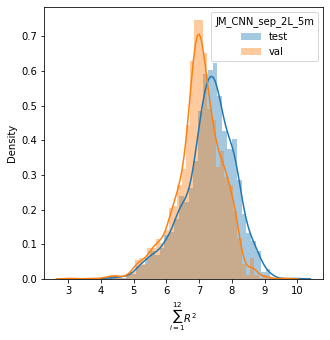

In [485]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [486]:
print_config("config_CNN_sep_2L_5m_12h")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.3],
          'activation2': ['elu', 0.4],
          'activation_full': ['elu', 0.4],
          'depth_multiplier': 8,
          'depth_multiplier2': 7,
          'dilation': False,
          'drop': 0.6,
          'drop2': 0.6,
          'filters': [1024],
          'filters2': [1024],
          'full': [1024],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [9],
          'kernel_size2': [1],
          'mode': 'CNN_sep_2l_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [2],
          'strides2': [4]},
 'data': {'aggregate': {'step': 12, 'y': {'method': 'average', 'step': 12}},
          'ahead': [1, 144],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 526008,
          'lag': 144,
          'scaler': 'standard',
          'testsize': 210408,
          'vars': 'all'},
 'experiment': 'CNN_se

### Separable 2 layers with larger parameters

In [499]:
query = {"experiment": "JM_CNN_sep_2L_5m_01","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

383

MEAN (test)= 7.26957449344808
StDev (test)= 0.7954722188515918
MEAN (val)= 6.927125321774377
StDev (val)= 0.7395635986499912


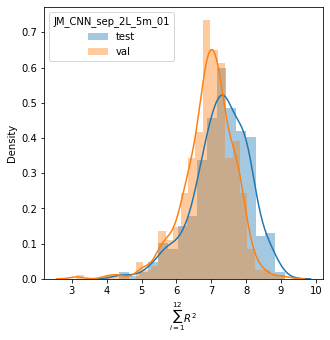

In [500]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [489]:
print_config("config_CNN_sep_2L_5m_12h_01")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.3],
          'activation2': ['elu', 0.4],
          'activation_full': ['elu', 0.4],
          'depth_multiplier': 8,
          'depth_multiplier2': 7,
          'dilation': False,
          'drop': 0.6,
          'drop2': 0.6,
          'filters': [1024],
          'filters2': [1024],
          'full': [1024],
          'fulldrop': 0.1,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [9],
          'kernel_size2': [1],
          'mode': 'CNN_sep_2l_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [2],
          'strides2': [4]},
 'data': {'aggregate': {'step': 12, 'y': {'method': 'average', 'step': 12}},
          'ahead': [1, 144],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 526008,
          'lag': 144,
          'scaler': 'standard',
          'testsize': 210408,
          'vars': 'all'},
 'experiment': 'CNN_se

### Separable 3 layers at 5 min

In [8]:
query = {"experiment": "JM_CNN_sep_3L_5m_01","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

415

MEAN (test)= 6.740072448999713
StDev (test)= 0.8173004863617925
MEAN (val)= 6.374040768842519
StDev (val)= 0.7332693319510829


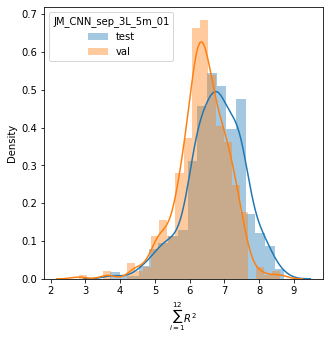

In [9]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [501]:
print_config("config_CNN_sep_3L_5m_12h_01")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['elu', 0.3],
          'depth_multiplier': 4,
          'depth_multiplier2': 7,
          'depth_multiplier3': 4,
          'dilation': False,
          'drop': 0.6,
          'drop2': 0.6,
          'drop3': 0.7,
          'filters': [512],
          'filters2': [1024],
          'filters3': [1024],
          'full': [4096],
          'fulldrop': 0.0,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [5],
          'kernel_size2': [3],
          'kernel_size3': [3],
          'mode': 'CNN_sep_3l_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [3],
          'strides2': [4],
          'strides3': [4]},
 'data': {'aggregate': {'step': 12, 'y': {'method': 'average', 'step': 12}},
          'ahead': [1, 144],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 526008,
          'lag': 144,
    

### Timeinception blocks architecture

In [493]:
query = {"experiment": "JM_CNN_IT","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

2000

MEAN (test)= 6.557396146641695
StDev (test)= 0.8346715387147089
MEAN (val)= 6.228876895106434
StDev (val)= 0.7792699491115147


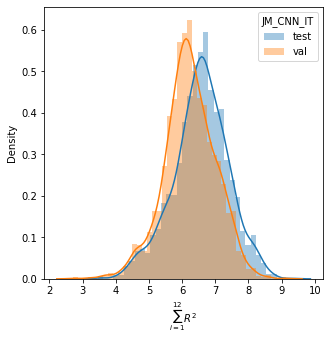

In [494]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [495]:
print_config("config_CNN_TimeInception_01")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.2],
          'activation_full': ['elu', 0.2],
          'batchnorm': False,
          'bias': False,
          'bottleneck': True,
          'bottleneck_size': 1,
          'depth': 4,
          'drop': 0.2,
          'filters': 256,
          'full': [512],
          'fulldrop': 0.3,
          'fulltype': 'mlp',
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3],
          'mode': 'TimeInception',
          'padding': 'same',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'residual': True,
          'separable': False,
          'strides': [11, 1]},
 'data': {'ahead': [1, 12],
          'angle': False,
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 12,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TimeInception',
 'training': {'batch': 1024,
         

### JM_CNN_IT_02

In [4]:
query = {"experiment": "JM_CNN_IT_02","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

1100

MEAN (test)= 5.962151202824413
StDev (test)= 1.1075319894064006
MEAN (val)= 5.681725277888557
StDev (val)= 0.9896374222711737


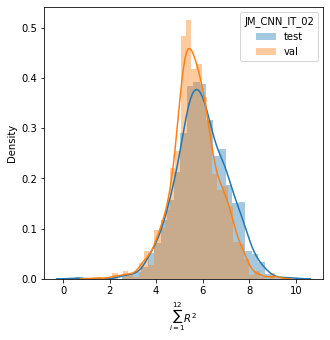

In [5]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [498]:
print_config("config_CNN_TimeInception_02")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.2],
          'activation_full': ['elu', 0.2],
          'batchnorm': False,
          'bias': False,
          'bottleneck': False,
          'bottleneck_size': 1,
          'depth': 4,
          'drop': 0.2,
          'filters': 256,
          'full': [512],
          'fulldrop': 0.3,
          'fulltype': 'mlp',
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3],
          'mode': 'TimeInception',
          'padding': 'same',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'residual': False,
          'separable': True,
          'strides': [7, 1]},
 'data': {'ahead': [1, 14],
          'angle': False,
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 43834,
          'lag': 144,
          'scaler': 'standard',
          'testsize': 17534,
          'vars': 'all'},
 'experiment': 'TimeInception',
 'training': {'batch': 1024,
        

### Classic Convolutional at 5 min series 01

In [46]:
query = {"experiment": "JM_CNN_5m_12h_01","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

285

MEAN (test)= 6.99976514702657
StDev (test)= 0.8037016366278646
MEAN (val)= 6.602416348352154
StDev (val)= 0.7027368066879394


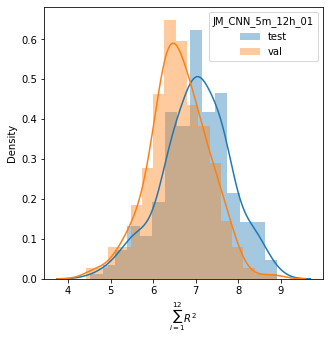

In [47]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

In [48]:
print_config("config_CNN_2L_5m_12h_01")

{'_id': '00000000',
 'arch': {'activation': ['elu', 0.4],
          'activation_full': ['leaky', 0.2],
          'dilation': False,
          'drop': 0.3,
          'drop2': 0.2,
          'filters': [128],
          'filters2': [128],
          'full': [512],
          'fulldrop': 0.3,
          'k_reg': 'None',
          'k_regw': 0.1,
          'kernel_size': [3],
          'kernel_size2': [1],
          'mode': 'CNN_2l_s2s',
          'rec_reg': 'None',
          'rec_regw': 0.1,
          'strides': [1],
          'strides2': [1]},
 'data': {'aggregate': {'step': 12, 'y': {'method': 'average', 'step': 12}},
          'ahead': [1, 144],
          'datanames': ['11-5794-12'],
          'dataset': 'onesitemanyvar',
          'datasize': 526008,
          'lag': 144,
          'scaler': 'standard',
          'testsize': 210408,
          'vars': 'all'},
 'experiment': 'CNN_2L_5m_12h_01',
 'training': {'batch': 1024,
              'epochs': 200,
              'iter': 1,
              '

In [40]:
query = {"experiment": "JM_CNN_sep_2L_5m_04","status":"done"}
results = DBResults(conn=mongolocal)
results.retrieve_results(query)
results.selected_size()

NameError: No results retrieved with query

MEAN (test)= 7.001169956502617
StDev (test)= 0.8283571598335814
MEAN (val)= 6.634176594655492
StDev (val)= 0.759519544270746


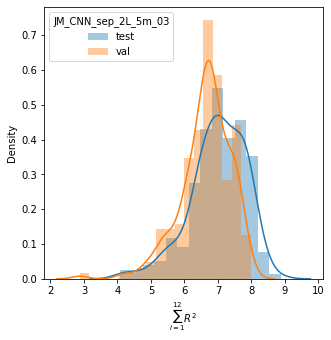

In [38]:
results.plot_distplot(seaborn=True, notebook=True, summary='sum',dset=(['test','val']), figsize=(5,5))

### Graph columns

[ 0.89170957  0.74480769  0.60723876  0.47551956  0.34960272  0.23058232
  0.11957486  0.01770195 -0.0742523  -0.15545216 -0.22517486 -0.28293148]
[0.90092453 0.80166592 0.72443592 0.65937601 0.6024358  0.55195131
 0.50713295 0.46755065 0.4326124  0.40151899 0.37332987 0.34718636]
[0.90990367 0.81748358 0.7474942  0.68942087 0.63855908 0.5932722
 0.55262721 0.51604599 0.48295777 0.45285037 0.42533606 0.39981711]
[0.91486292 0.82362144 0.75520979 0.69835662 0.6484585  0.60386786
 0.56377257 0.52748701 0.49439152 0.46416279 0.4364863  0.41078316]
[0.91486292 0.82362144 0.75520979 0.69835662 0.6484585  0.60386786
 0.56377257 0.52748701 0.49439152 0.46416279 0.4364863  0.41078316]
5


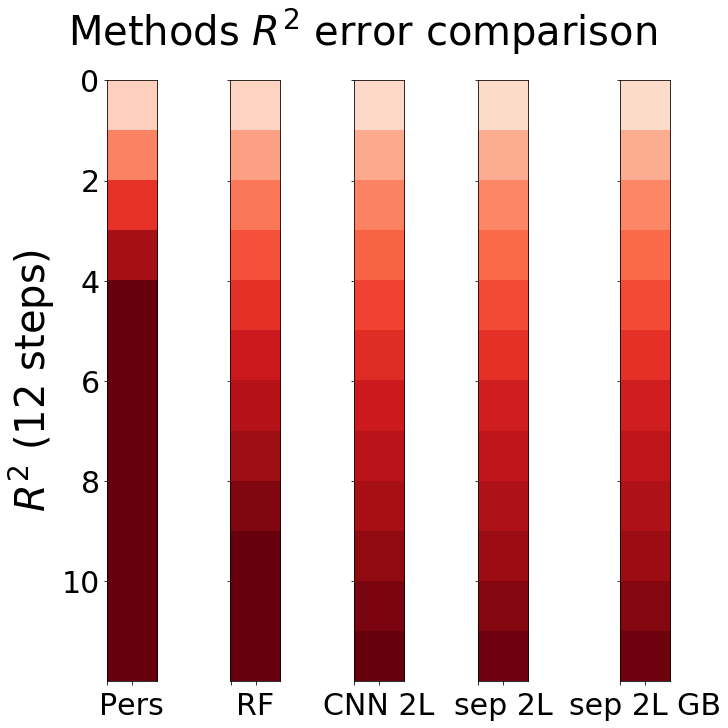

In [61]:
create_figure_barras(archs=["Persistence","JM_RF_s2s_2","JM_CNN_2L","JM_CNN_sep_2l_GB1","JM_CNN_sep_2l_GB1"], titles=['Pers', 'RF', 'CNN 2L', 'sep 2L', 'sep 2L GB'], save=True)